<a href="https://colab.research.google.com/github/rashida048/Tensorflow/blob/main/decay_learning_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

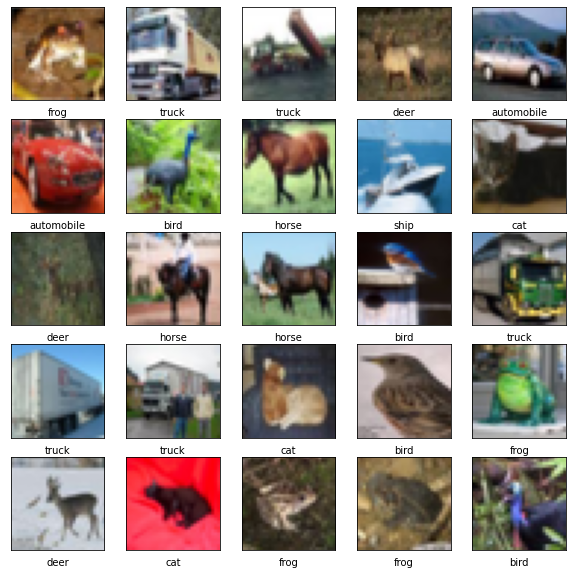

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [9]:
import numpy as np 

In [7]:
def stepDecay(epochs, initialAlpha=0.01, factor=0.25, dropEvery=10):
  e = np.floor(1+epochs) / dropEvery 
  alpha=initialAlpha * (factor ** e)
  return  float(alpha)

In [ ]:
def polynomialDecay(epochs, maxEpochs=100, initialAlpha=0.01, power=1.0):
  decay = (1 - (epochs / float(maxEpochs)) ** power)
  alpha = initialAlpha * decay
  return alpha

In [ ]:
def linearDecay(epochs):
  return 1e-1/epochs 

In [12]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01, decay = stepDecay(epochs = 40)),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=40, 
                    validation_data=(test_images, test_labels))

Epoch 1/40
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3610 - accuracy: 0.5234 - val_loss: 1.2812 - val_accuracy: 0.5513
Epoch 2/40
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3207 - accuracy: 0.5429 - val_loss: 1.3854 - val_accuracy: 0.5298
Epoch 3/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2901 - accuracy: 0.5562 - val_loss: 1.2562 - val_accuracy: 0.5679
Epoch 4/40
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2467 - accuracy: 0.5726 - val_loss: 1.3194 - val_accuracy: 0.5504
Epoch 5/40
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2198 - accuracy: 0.5809 - val_loss: 1.3244 - val_accuracy: 0.5566
Epoch 6/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1893 - accuracy: 0.5961 - val_loss: 1.2768 - val_accuracy: 0.5741
Epoch 7/40
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1694 - accuracy: 0.6040 - val_loss: 1.2417 - val_accuracy

313/313 - 1s - loss: 1.6968 - accuracy: 0.6200 - 878ms/epoch - 3ms/step


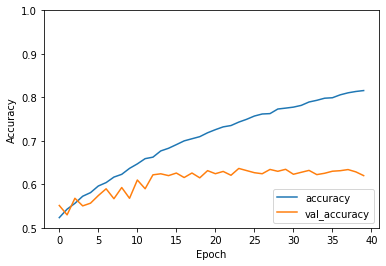

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)